In [335]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [336]:
file_path = r'D:\GitHub\UEL-Course\Kì Hè Năm 3\1. Deep Learning\1. Thực hành lớp\B8\Customer_Churn.csv'
data = pd.read_csv(file_path)

In [337]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [338]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [340]:
data.duplicated().sum()

0

In [341]:
# Drop customerID column
data = data.drop(columns=['customerID'])

In [342]:
# Convert TotalCharges to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with NaN values in TotalCharges
data = data.dropna(subset=['TotalCharges'])

In [343]:
# Convert categorical variables to numeric (0, 1, ...)
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: pd.factorize(x)[0])

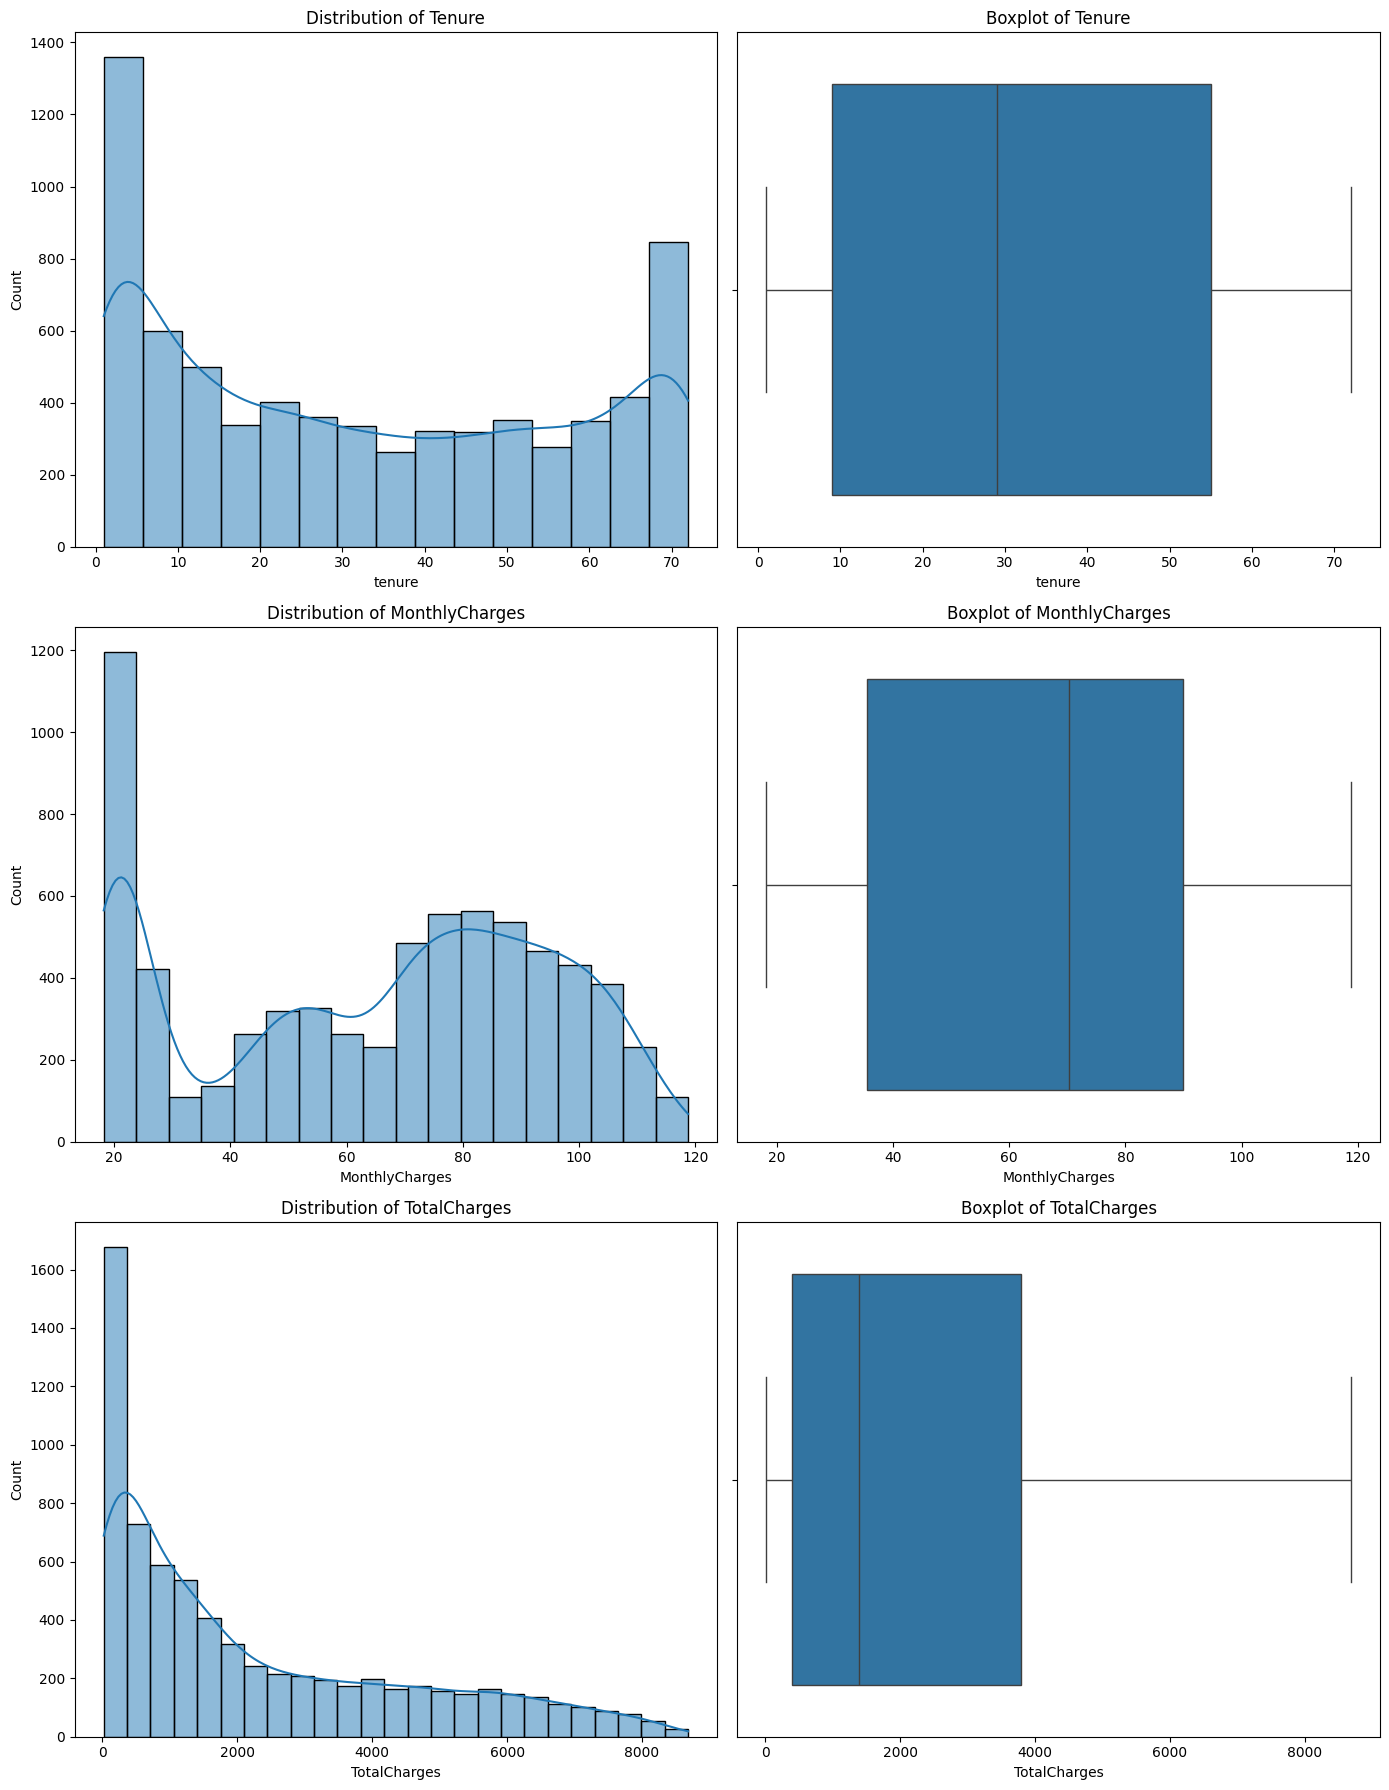

In [344]:
# Vẽ biểu đồ phân phối và boxplot cho các biến tenure, MonthlyCharges, và TotalCharges

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Biểu đồ phân phối và boxplot cho biến tenure
sns.histplot(data['tenure'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Tenure')
sns.boxplot(x=data['tenure'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Tenure')

# Biểu đồ phân phối và boxplot cho biến MonthlyCharges
sns.histplot(data['MonthlyCharges'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of MonthlyCharges')
sns.boxplot(x=data['MonthlyCharges'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of MonthlyCharges')

# Biểu đồ phân phối và boxplot cho biến TotalCharges
sns.histplot(data['TotalCharges'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of TotalCharges')
sns.boxplot(x=data['TotalCharges'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of TotalCharges')

plt.tight_layout()
plt.show()


In [345]:
# Apply RobustScaler to tenure, MonthlyCharges, and TotalCharges
scaler = RobustScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [346]:
# Separate features and target variable
X = data.drop(columns=['Churn', 'tenure'])
y = data['Churn']

# Split the data into training and testing sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


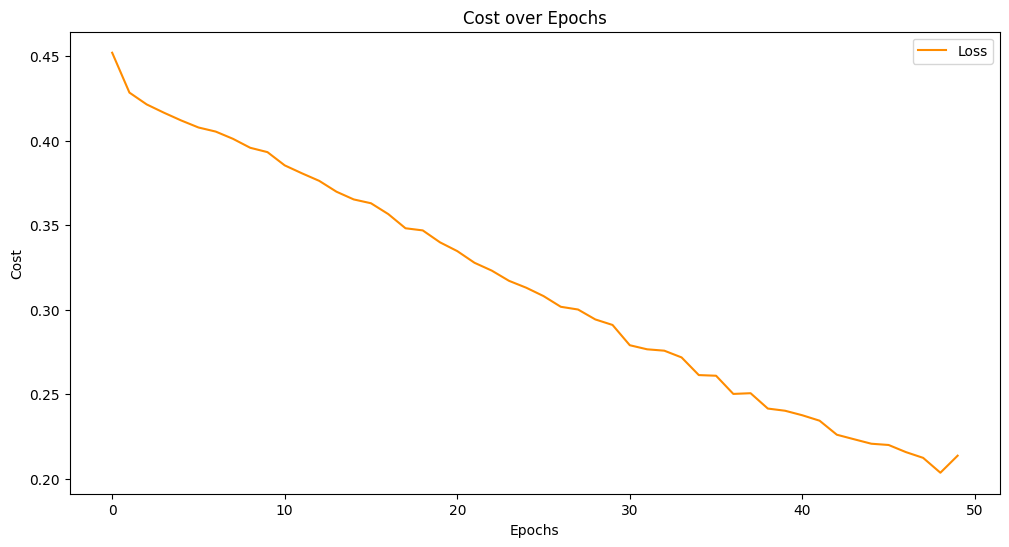

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted outputs after training:
[[6.0789625e-04]
 [1.7847502e-01]
 [9.3362081e-01]
 ...
 [2.1208312e-07]
 [3.7316240e-02]
 [4.4068901e-04]]


NameError: name 'outputs' is not defined

In [347]:
# Plotting the training progress
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss', color='darkorange')
plt.title('Cost over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Predicting the outputs
predicted_output = model.predict(X_test)
print("Predicted outputs after training:")
print(predicted_output)

# Calculating accuracy
accuracy = accuracy_score(outputs, (predicted_output > 0.5).astype(int))
print("Accuracy of the deep learning model:", accuracy)

In [ ]:
# Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model Accuracy: 0.7860696517412935
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

